# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

In [2]:
#### load the automobile dataset and create dataframes
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import missingno

auto_df = pd.read_csv('automobile.txt')

In [3]:
#data types
auto_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<AxesSubplot: >

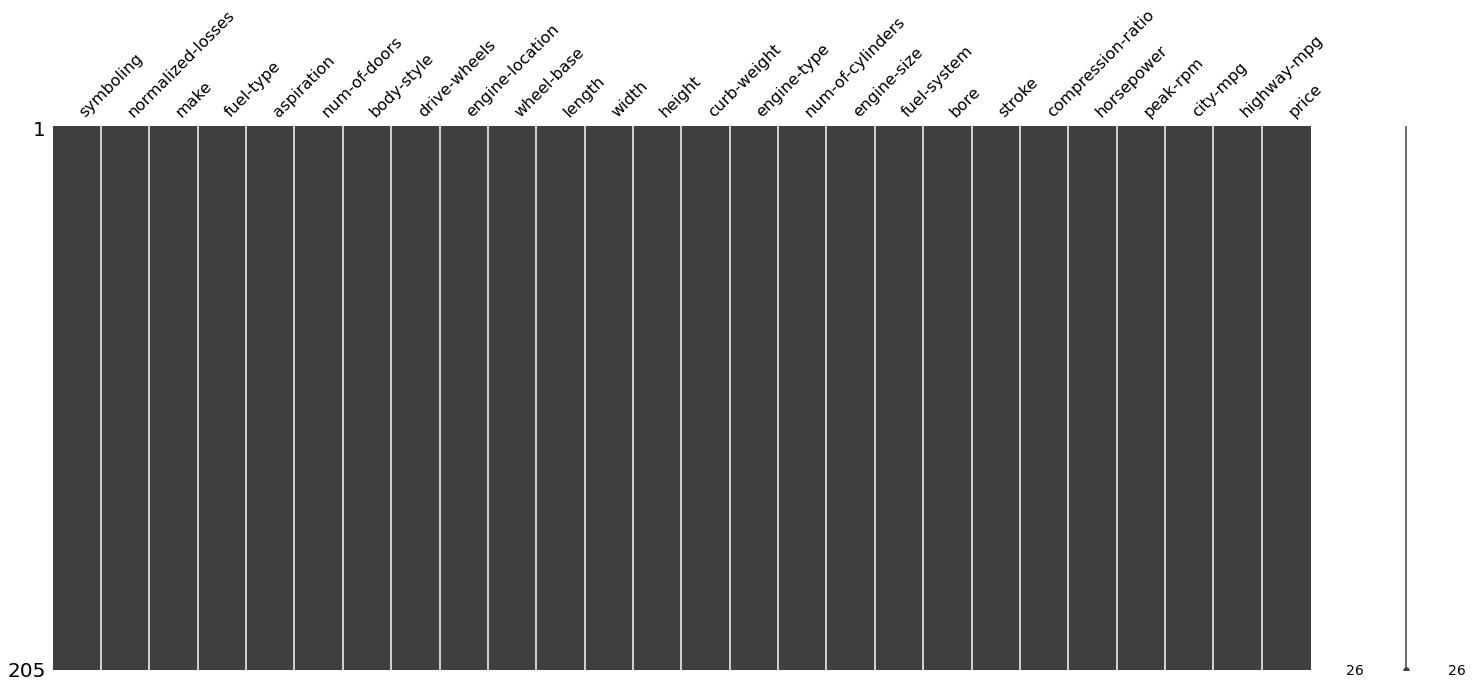

In [4]:
# We use the missingno package to check for missing values in our dataframe
missingno.matrix(auto_df)

The graph indicates full data as all columns display full bars. However, inspection of the dataframe reveals missing values represented by "question marks" in column 2. Replacing these with "NaN" would provide a clearer representation of the data.





<AxesSubplot: >

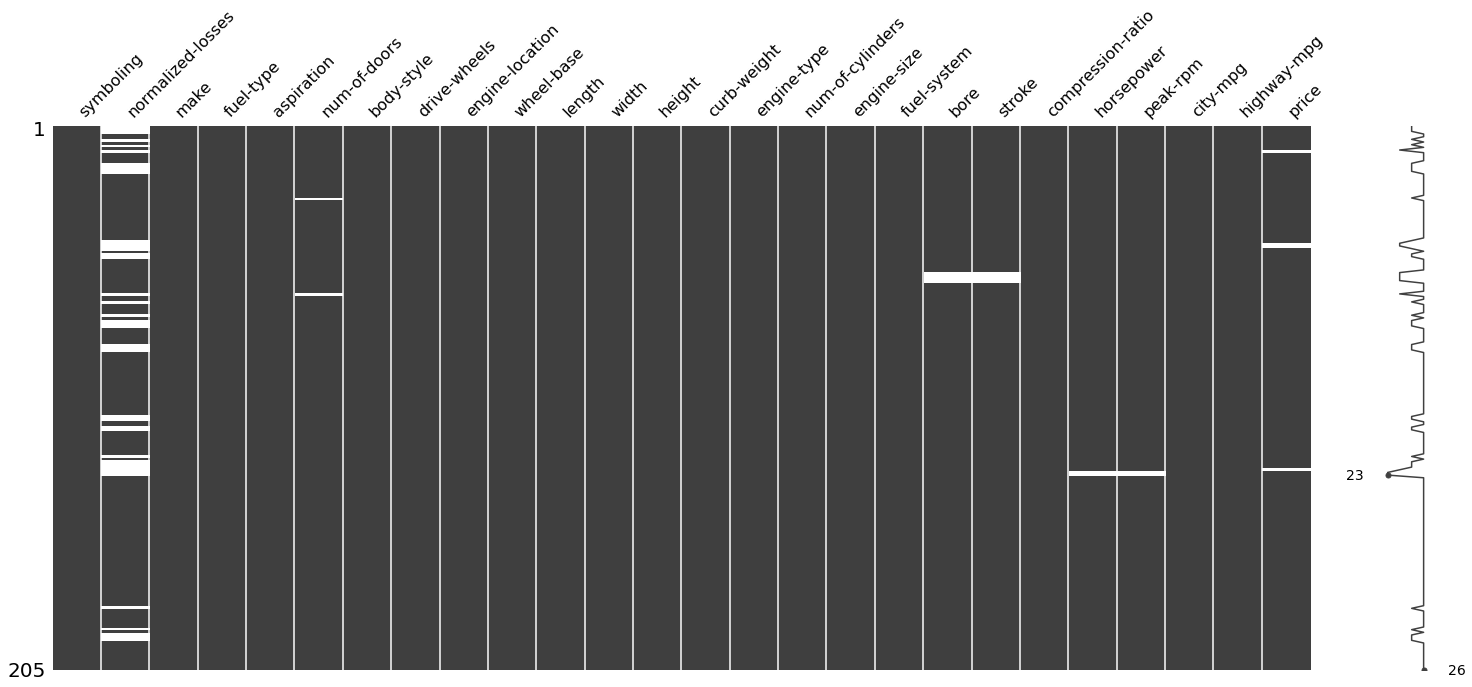

In [5]:
auto_df.replace("?",np.nan,inplace=True)
missingno.matrix(auto_df)

Examination of the data shows a significant amount of missing information in the "normalized_losses" column, therefore it will be omitted as it is not a critical factor in the analysis. Some other columns, including "horsepower" and "price", also have missing data. To maintain accuracy, the entire rows with missing information will be removed.





<AxesSubplot: >

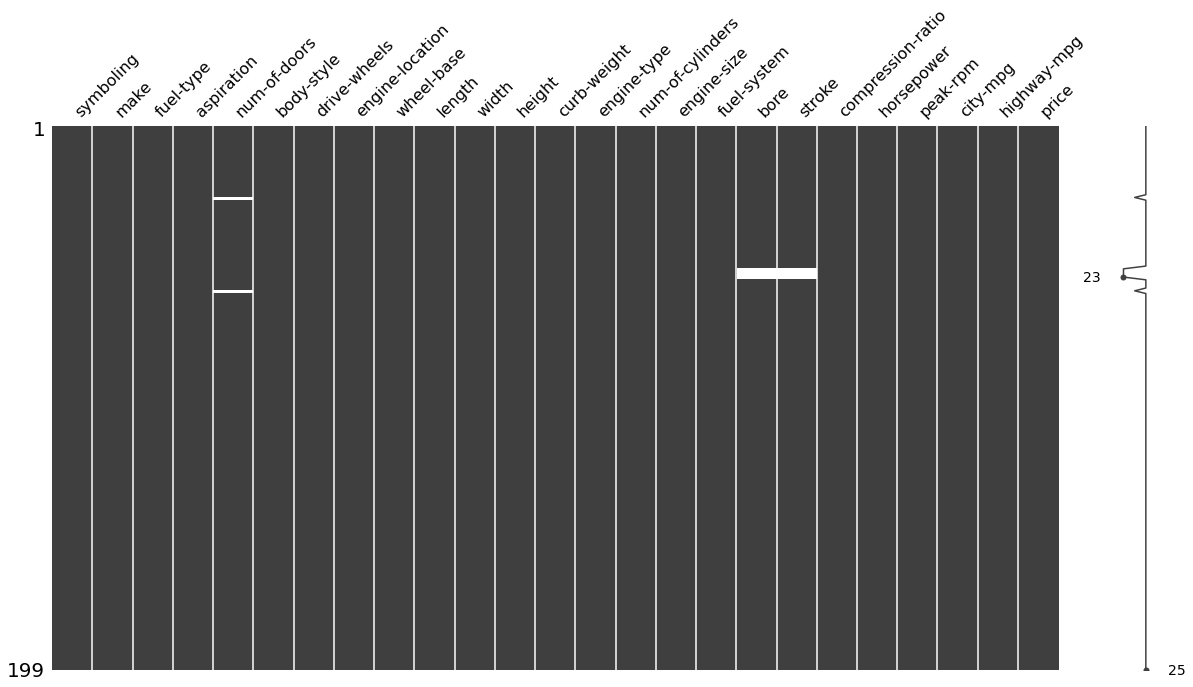

In [6]:
auto_df.drop('normalized-losses', axis = 1, inplace=True)
auto_df.dropna(subset=['horsepower','price',],axis=0,inplace=True)
missingno.matrix(auto_df, figsize = (20,10))

Replace empty values in 'number of doors', 'bore', and 'stroke' with average of each column, and convert the data type to integer.

In [7]:
auto_df['stroke'] = auto_df['stroke'].astype(float)
auto_df['bore'] = auto_df['bore'].astype(float)

<AxesSubplot: >

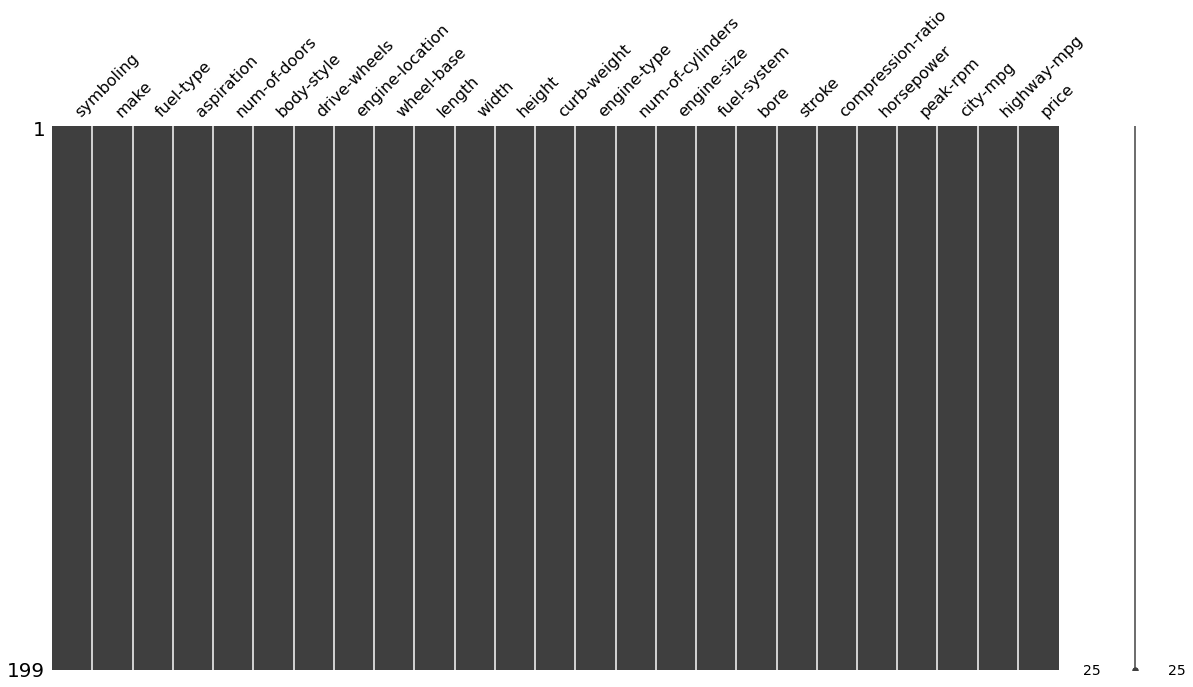

In [8]:
auto_df['num-of-doors'].replace(np.nan,auto_df['num-of-doors'].mode,inplace=True)
auto_df['bore'].replace(np.nan,auto_df['bore'].mean(),inplace=True)
auto_df['stroke'].replace(np.nan,auto_df['stroke'].mean(),inplace=True)
missingno.matrix(auto_df, figsize = (20,10))

In [9]:
auto_df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now the data has been cleaned I can analyse the data.
 - Count of Automobiles by Make?
 - Average Engine size per brand? 
 - Body style popularity?
 - Proportion of Fuel Types?
 - Relationship between Horsepower and Price?
 


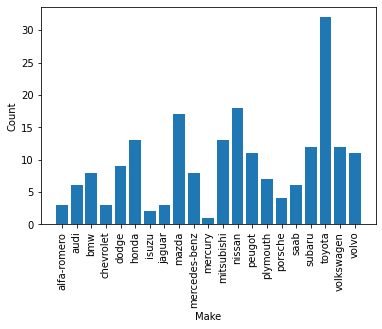

In [45]:


# Group the data by the make column and calculate the number of observations in each group
grouped_data = auto_df.groupby("make").size().reset_index(name="counts")

# Plot the bar chart
plt.bar(grouped_data["make"], grouped_data["counts"])
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


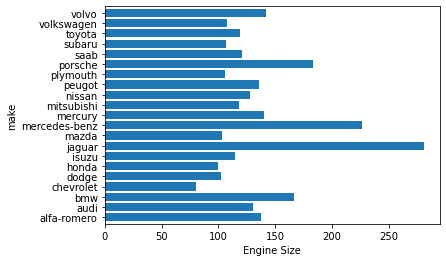

In [18]:
auto_df.groupby('make')['engine-size'].mean().plot(kind ='barh', width = 0.8)
plt.title = ('Average Engine Size Per Make')
plt.xlabel('Engine Size')
plt.show()

array([<AxesSubplot: ylabel='Body Style'>], dtype=object)

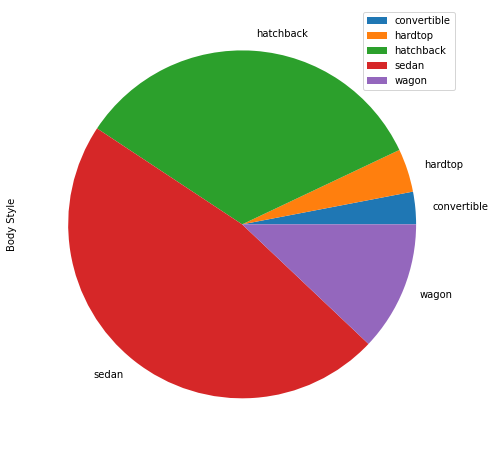

In [28]:
# group by Engine Size
group_by_BodyStyle = auto_df.groupby(by=['body-style'])

car_typeBodyStyle_Count = group_by_BodyStyle.count()

# get first column
car_typeBodyStyle_Count = pd.DataFrame(car_typeBodyStyle_Count.iloc[:,0])

car_typeBodyStyle_Count.rename(columns={'make': 'body-style'}, inplace=True)

car_typeBodyStyle_Count.plot.pie(subplots=True,figsize=(8, 8), ylabel = 'Body Style')

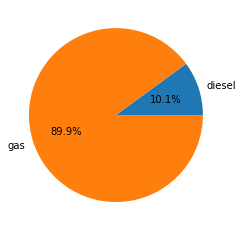

In [62]:
# Group the data by the fuel-type column and calculate the number of observations in each group
grouped_data = auto_df.groupby("fuel-type").size().reset_index(name="counts")

# Plot the pie chart
plt.pie(grouped_data["counts"], labels=grouped_data["fuel-type"], autopct='%1.1f%%')
plt.show()

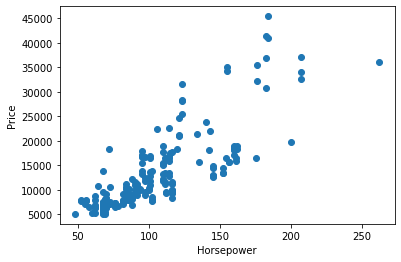

In [64]:
auto_df["horsepower"] = pd.to_numeric(auto_df["horsepower"], errors="coerce")
auto_df["price"] = pd.to_numeric(auto_df["price"], errors="coerce")

# Plot the scatter plot
plt.scatter(auto_df["horsepower"], auto_df["price"])
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()